<a href="https://colab.research.google.com/github/Rajchamp10/False_9/blob/main/SIH'24_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet pandas matplotlib


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/566tmtf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/yz6ynqxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81297', 'data', 'file=/tmp/tmpr3k06uim/566tmtf6.json', 'init=/tmp/tmpr3k06uim/yz6ynqxo.json', 'output', 'file=/tmp/tmpr3k06uim/prophet_modelnyjha59_/prophet_model-20240902075907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

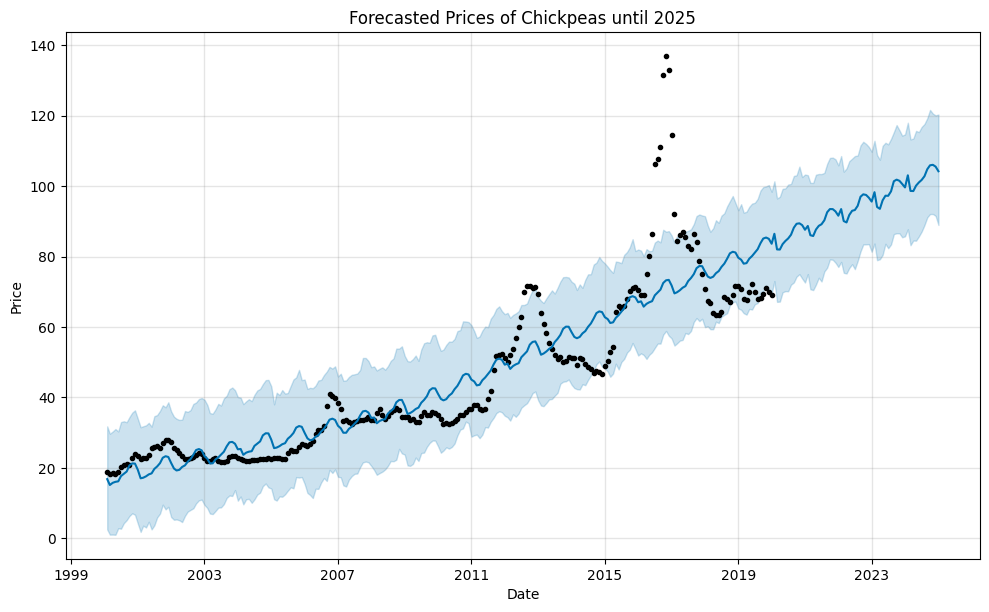

RMSE: 11.350756940686834
MAE: 7.236408189282658


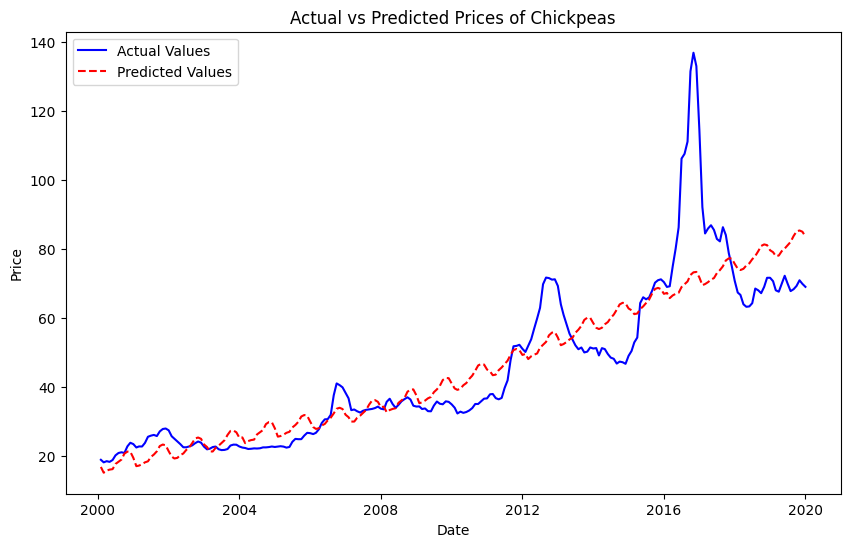

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your data
# Assuming your data is in a CSV file
data = pd.read_csv('/content/drive/MyDrive/India ')

# Prepare the data for Prophet
# Prophet expects two columns: 'ds' (date) and 'y' (value to predict)
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['date'])  # Replace 'Date' with the name of your date column
df['y'] = data['Chickpeas']  # Replace 'Chickpeas' with the name of your column

# Initialize and fit the model
model = Prophet()
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=5*12, freq='M')  # Predict until 2025 (5 years ahead)
forecast = model.predict(future)

# Visualize the forecast
fig1 = model.plot(forecast)
plt.title('Forecasted Prices of Chickpeas until 2025')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate and print RMSE and MAE
y_true = df['y'].values
y_pred = forecast['yhat'][:len(y_true)].values
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual Values', color='blue')
plt.plot(df['ds'], forecast['yhat'][:len(y_true)], label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Prices of Chickpeas')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/we2cgo_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/j60kshoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20933', 'data', 'file=/tmp/tmpr3k06uim/we2cgo_7.json', 'init=/tmp/tmpr3k06uim/j60kshoq.json', 'output', 'file=/tmp/tmpr3k06uim/prophet_modelvhnhxs8e/prophet_model-20240902075930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 7.634941192858466
MAE: 3.831556253467648


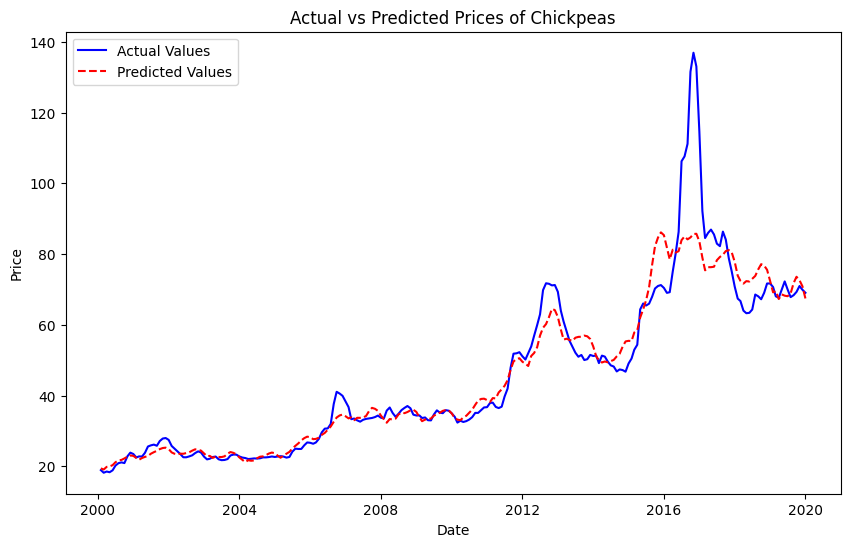

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load your data
data = pd.read_csv('/content/drive/MyDrive/India ')

# Log transform if data has high variance
data['Chickpeas'] = np.log1p(data['Chickpeas'])

# Prepare the data for Prophet
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['date'])  # Replace 'Date' with the name of your date column
df['y'] = data['Chickpeas']

# Initialize and fit the model with additional tuning
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10
)
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=5*12, freq='M')  # Predict until 2025 (5 years ahead)
forecast = model.predict(future)

# Reverse the log transformation
forecast['yhat'] = np.expm1(forecast['yhat'])

# Calculate RMSE and MAE
y_true = np.expm1(df['y']).values
y_pred = forecast['yhat'][:len(y_true)].values
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], y_true, label='Actual Values', color='blue')
plt.plot(df['ds'], y_pred, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Prices of Chickpeas')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/wiauatdu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/72n58hm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83877', 'data', 'file=/tmp/tmpr3k06uim/wiauatdu.json', 'init=/tmp/tmpr3k06uim/72n58hm6.json', 'output', 'file=/tmp/tmpr3k06uim/prophet_modelo9cot7_k/prophet_model-20240902075953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


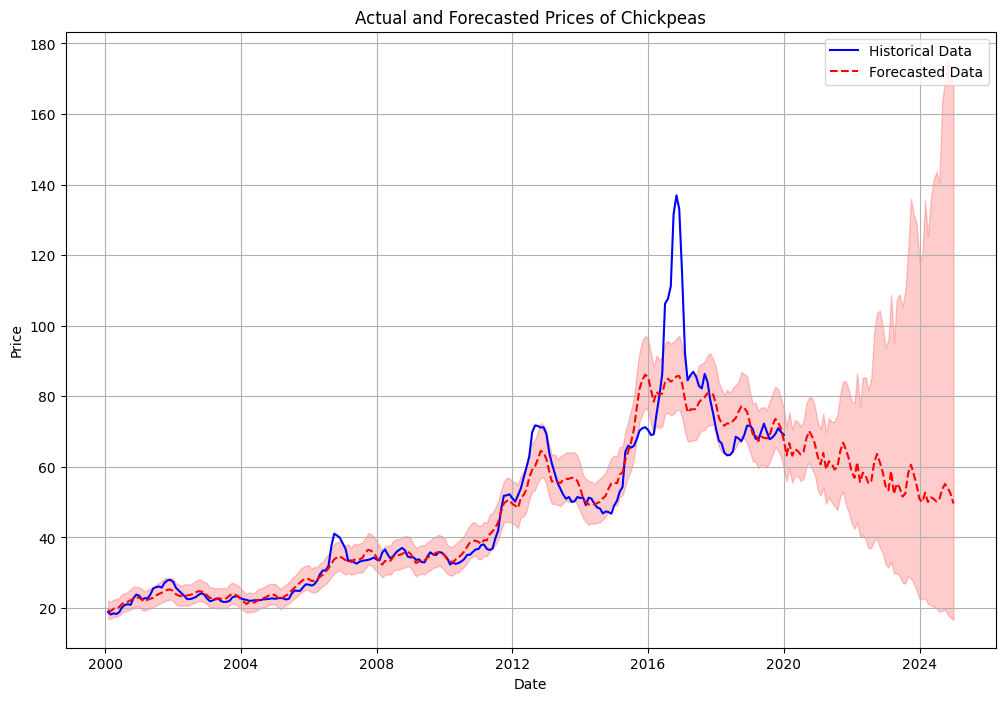

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load your data
data = pd.read_csv('/content/drive/MyDrive/India ')

# Log transform if data has high variance
data['Chickpeas'] = np.log1p(data['Chickpeas'])

# Prepare the data for Prophet
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['date'])  # Replace 'date' with the name of your date column
df['y'] = data['Chickpeas']

# Initialize and fit the model with additional tuning
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10
)
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=5*12, freq='M')  # Predict until 2025 (5 years ahead)
forecast = model.predict(future)

# Reverse the log transformation for predictions
forecast['yhat'] = np.expm1(forecast['yhat'])
forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

# Reverse the log transformation for historical data
df['y'] = np.expm1(df['y'])

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))

# Plot historical data
plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot forecast uncertainty intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Forecasted Prices of Chickpeas')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/vlpazjs0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/cbz0nyly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26933', 'data', 'file=/tmp/tmpr3k06uim/vlpazjs0.json', 'init=/tmp/tmpr3k06uim/cbz0nyly.json', 'output', 'file=/tmp/tmpr3k06uim/prophet_modelqk3csihh/prophet_model-20240902080119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


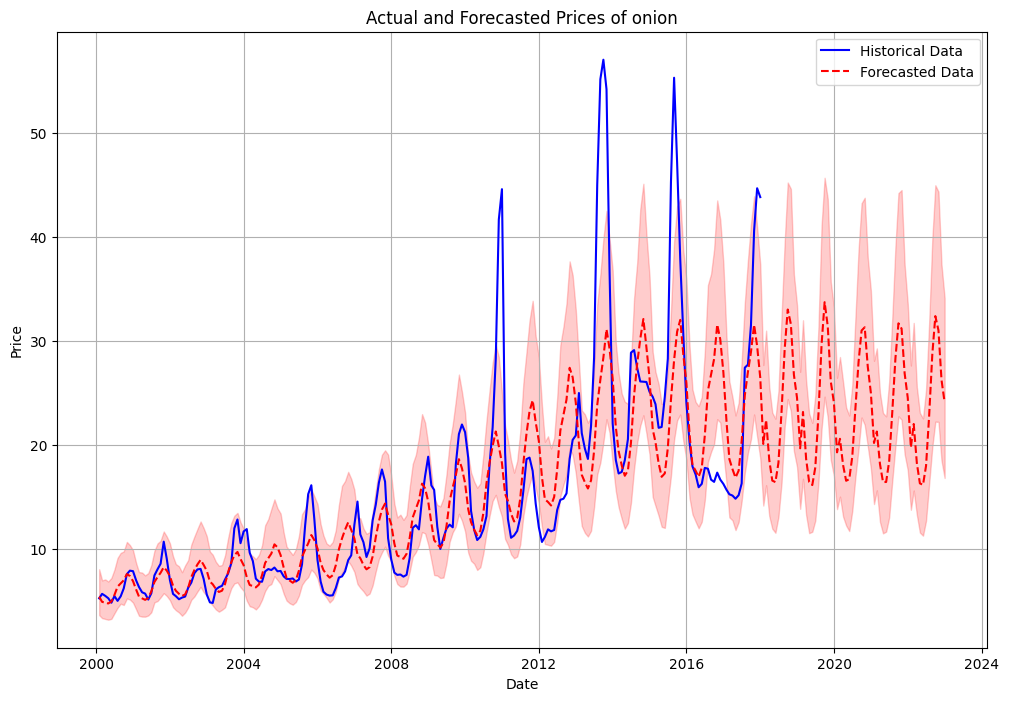

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load your data
data = pd.read_csv('/content/drive/MyDrive/India ')

# Log transform if data has high variance
data['Onions'] = np.log1p(data['Onions'])

# Prepare the data for Prophet
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['date'])  # Replace 'date' with the name of your date column
df['y'] = data['Onions']

# Initialize and fit the model with additional tuning
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10
)
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=5*12, freq='M')  # Predict until 2025 (5 years ahead)
forecast = model.predict(future)

# Reverse the log transformation for predictions
forecast['yhat'] = np.expm1(forecast['yhat'])
forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

# Reverse the log transformation for historical data
df['y'] = np.expm1(df['y'])

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))

# Plot historical data
plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot forecast uncertainty intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Forecasted Prices of onion')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/gg68wdrl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr3k06uim/4aa7blcw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38156', 'data', 'file=/tmp/tmpr3k06uim/gg68wdrl.json', 'init=/tmp/tmpr3k06uim/4aa7blcw.json', 'output', 'file=/tmp/tmpr3k06uim/prophet_modelkg4wswn4/prophet_model-20240902080541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:05:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


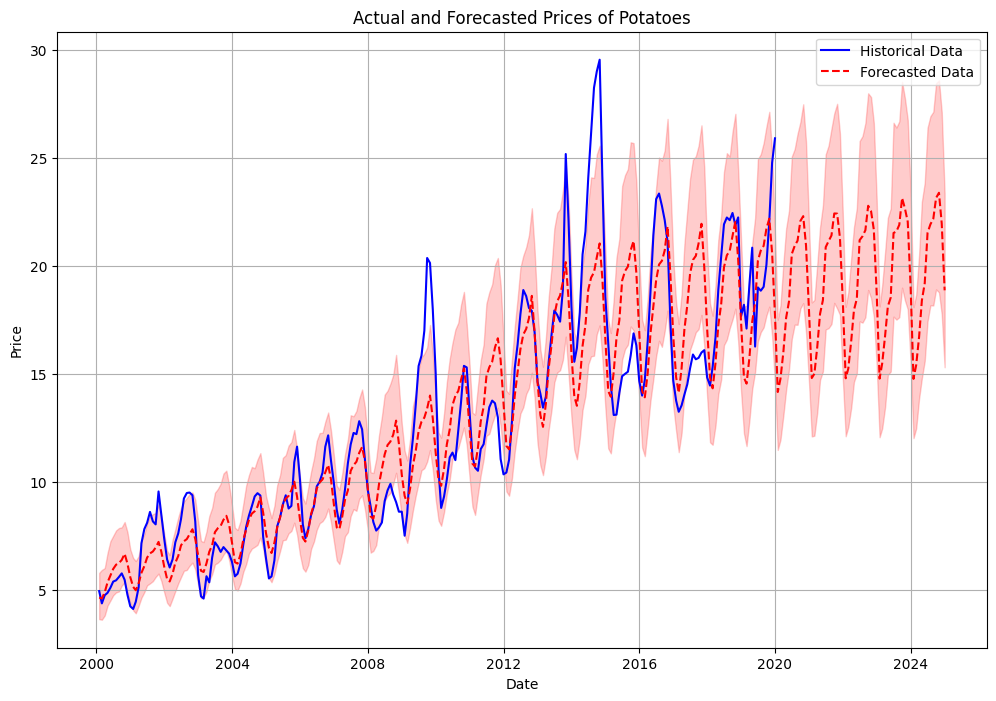

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load your data
data = pd.read_csv('/content/drive/MyDrive/India ')

# Log transform if data has high variance
data['Potatoes'] = np.log1p(data['Potatoes'])

# Prepare the data for Prophet
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['date'])  # Replace 'date' with the name of your date column
df['y'] = data['Potatoes']

# Initialize and fit the model with additional tuning
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=10
)
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=5*12, freq='M')  # Predict until 2025 (5 years ahead)
forecast = model.predict(future)

# Reverse the log transformation for predictions
forecast['yhat'] = np.expm1(forecast['yhat'])
forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])

# Reverse the log transformation for historical data
df['y'] = np.expm1(df['y'])

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))

# Plot historical data
plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot forecast uncertainty intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Forecasted Prices of Potatoes')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
overlap = forecast[forecast['ds'].isin(df['ds'])]

# Ensure there's no data mismatch
if not overlap.empty:
    y_true = df.set_index('ds').loc[overlap['ds']]['y']
    y_pred = overlap['yhat']

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')

    # Calculate RMSE
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    print(f'Mean Absolute Error (MAE): {mae}')
else:
    print('No overlapping data for RMSE and MAE calculation.')

Mean Squared Error (MSE): 5.930280284708338
Root Mean Squared Error (RMSE): 2.4352166812643876
Mean Absolute Error (MAE): 1.7834447479691342
